In [1]:
# Setup

## Load packages

In [2]:
import os
import pandas as pd
import matplotlib
import requests   # manage web requests
import numpy as np   # core methods package for math and to manage various data objects; many other uses
import matplotlib.pyplot as plt  # plotting library
#from sklearn import linear_model   # data science library; not loading in jupyter
import statsmodels.formula.api as sm  # statistics library
import seaborn as sns   # data visualization library
import inspect # contains getsource() function to inspect source code
import platform # to check identifying info of python, e.g., version

## Check Python Version

In [3]:
platform.python_version()

'3.7.8'

## Set Directory Structure


### Working Directory
Not really needed on jupyter container because home directory is set. All filepaths are relative to home directory.

In [3]:
print(os.getcwd()) # check current working dir
path = '/home/jovyan/'
os.chdir(path)
print(os.getcwd()) # ensure cwd changed to desired dir

/home/jovyan/code
/home/jovyan


### Make Subdirectories

In [3]:
os.makedirs('./code', exist_ok=True)
os.makedirs('./data', exist_ok=True)
os.makedirs('./figures', exist_ok=True)
os.makedirs('./tables', exist_ok=True)

### Check Directory Contents

In [7]:
os.listdir()

['.profile',
 '.bash_logout',
 '.bashrc',
 '.ipython',
 'figures',
 'code',
 '.config',
 'tables',
 '.cache',
 '.local',
 '.git',
 'data',
 'README.md',
 'environment.yml',
 '.empty',
 '.conda']

# Load Data

In [4]:
df = pd.read_csv('./data/original/metoo_data.csv')

In [5]:
df

,id,senator_party,condition,pid7,pre_sexism_1,pre_sexism_2,pre_sexism_3,pre_sexism_4,pre_favorability,pre_vote,...,post_vote,punishment_1,punishment_2,punishment_3,punishment_4,punishment_5,post_sexism_1,post_sexism_2,post_sexism_3,post_sexism_4
0,1,Democrat,2,Strong Republican,Agree strongly,Disagree strongly,Disagree somewhat,Agree strongly,5,3,...,7,Neither disagree nor agree,Agree somewhat,Disagree somewhat,Disagree somewhat,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly
1,2,Republican,2,Not very strong Democrat,Disagree somewhat,Agree somewhat,Neither disagree nor agree,Disagree somewhat,5,3,...,2,Disagree somewhat,Neither disagree nor agree,Disagree somewhat,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree
2,3,Republican,2,Strong Democrat,Disagree strongly,Neither disagree nor agree,Neither disagree nor agree,Disagree strongly,5,2,...,2,Disagree strongly,Agree strongly,Disagree strongly,Agree strongly,Neither disagree nor agree,Disagree strongly,Disagree strongly,Disagree somewhat,Disagree strongly
3,4,Republican,1,Independent,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,7,6,...,7,Neither disagree nor agree,Agree somewhat,Neither disagree nor agree,Disagree somewhat,Neither disagree nor agree,Agree somewhat,Agree somewhat,Disagree strongly,Neither disagree nor agree
4,5,Democrat,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,6,8,...,8,NaN,NaN,NaN,NaN,NaN,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,2803,Democrat,1,Strong Republican,Agree somewhat,Agree somewhat,Disagree somewhat,Agree somewhat,1,2,...,3,Agree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Agree strongly,Agree strongly,Disagree strongly,Agree strongly
2802,2804,Republican,2,Strong Republican,Agree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat,7,10,...,8,Agree strongly,Disagree strongly,Agree strongly,Disagree strongly,Agree strongly,Agree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat
2803,2805,Republican,2,Not very strong Democrat,Agree somewhat,Agree strongly,Agree strongly,Agree somewhat,8,8,...,9,Neither disagree nor agree,Agree somewhat,Disagree strongly,Disagree somewhat,Agree strongly,Agree somewhat,Agree somewhat,Agree strongly,Agree somewhat
2804,2806,Republican,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,5,0,...,0,NaN,NaN,NaN,NaN,NaN,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly


In [34]:
# can also index within objects
df.iloc[0:5,0:9]
# notice first index value in python is 0

,id,senator_party,condition,pid7,pre_sexism_1,pre_sexism_2,pre_sexism_3,pre_sexism_4,pre_favorability
0,1,Democrat,2,Strong Republican,Agree strongly,Disagree strongly,Disagree somewhat,Agree strongly,5
1,2,Republican,2,Not very strong Democrat,Disagree somewhat,Agree somewhat,Neither disagree nor agree,Disagree somewhat,5
2,3,Republican,2,Strong Democrat,Disagree strongly,Neither disagree nor agree,Neither disagree nor agree,Disagree strongly,5
3,4,Republican,1,Independent,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,7
4,5,Democrat,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,6


In [6]:
df.dtypes

id                    int64
senator_party        object
condition             int64
pid7                 object
pre_sexism_1         object
pre_sexism_2         object
pre_sexism_3         object
pre_sexism_4         object
pre_favorability      int64
pre_vote              int64
gender               object
age                  object
newsinterest         object
post_favorability     int64
post_vote             int64
punishment_1         object
punishment_2         object
punishment_3         object
punishment_4         object
punishment_5         object
post_sexism_1        object
post_sexism_2        object
post_sexism_3        object
post_sexism_4        object
dtype: object

# Data Processing

In [5]:
# recode experimental condition
df.loc[df['condition']==1, 'condition2'] = 'Jokes'
df.loc[df['condition']==2, 'condition2'] = 'Assault'
df.loc[df['condition']==3, 'condition2'] = 'Control'

In [37]:
df

,id,senator_party,condition,pid7,pre_sexism_1,pre_sexism_2,pre_sexism_3,pre_sexism_4,pre_favorability,pre_vote,...,punishment_1,punishment_2,punishment_3,punishment_4,punishment_5,post_sexism_1,post_sexism_2,post_sexism_3,post_sexism_4,condition2
0,1,Democrat,2,Strong Republican,Agree strongly,Disagree strongly,Disagree somewhat,Agree strongly,5,3,...,Neither disagree nor agree,Agree somewhat,Disagree somewhat,Disagree somewhat,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Assault
1,2,Republican,2,Not very strong Democrat,Disagree somewhat,Agree somewhat,Neither disagree nor agree,Disagree somewhat,5,3,...,Disagree somewhat,Neither disagree nor agree,Disagree somewhat,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Assault
2,3,Republican,2,Strong Democrat,Disagree strongly,Neither disagree nor agree,Neither disagree nor agree,Disagree strongly,5,2,...,Disagree strongly,Agree strongly,Disagree strongly,Agree strongly,Neither disagree nor agree,Disagree strongly,Disagree strongly,Disagree somewhat,Disagree strongly,Assault
3,4,Republican,1,Independent,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,7,6,...,Neither disagree nor agree,Agree somewhat,Neither disagree nor agree,Disagree somewhat,Neither disagree nor agree,Agree somewhat,Agree somewhat,Disagree strongly,Neither disagree nor agree,Jokes
4,5,Democrat,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,6,8,...,NaN,NaN,NaN,NaN,NaN,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,2803,Democrat,1,Strong Republican,Agree somewhat,Agree somewhat,Disagree somewhat,Agree somewhat,1,2,...,Agree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Agree strongly,Agree strongly,Disagree strongly,Agree strongly,Jokes
2802,2804,Republican,2,Strong Republican,Agree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat,7,10,...,Agree strongly,Disagree strongly,Agree strongly,Disagree strongly,Agree strongly,Agree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat,Assault
2803,2805,Republican,2,Not very strong Democrat,Agree somewhat,Agree strongly,Agree strongly,Agree somewhat,8,8,...,Neither disagree nor agree,Agree somewhat,Disagree strongly,Disagree somewhat,Agree strongly,Agree somewhat,Agree somewhat,Agree strongly,Agree somewhat,Assault
2804,2806,Republican,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,5,0,...,NaN,NaN,NaN,NaN,NaN,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,Control


In [38]:
df.dtypes

id                    int64
senator_party        object
condition             int64
pid7                 object
pre_sexism_1         object
pre_sexism_2         object
pre_sexism_3         object
pre_sexism_4         object
pre_favorability      int64
pre_vote              int64
gender               object
age                  object
newsinterest         object
post_favorability     int64
post_vote             int64
punishment_1         object
punishment_2         object
punishment_3         object
punishment_4         object
punishment_5         object
post_sexism_1        object
post_sexism_2        object
post_sexism_3        object
post_sexism_4        object
condition2           object
dtype: object

In [6]:
# make categorical
df['condition2'] = pd.Categorical(df['condition2'])
df.dtypes

id                      int64
senator_party          object
condition               int64
pid7                   object
pre_sexism_1           object
pre_sexism_2           object
pre_sexism_3           object
pre_sexism_4           object
pre_favorability        int64
pre_vote                int64
gender                 object
age                    object
newsinterest           object
post_favorability       int64
post_vote               int64
punishment_1           object
punishment_2           object
punishment_3           object
punishment_4           object
punishment_5           object
post_sexism_1          object
post_sexism_2          object
post_sexism_3          object
post_sexism_4          object
condition2           category
dtype: object

In [40]:
# check order
df['condition2']

0       Assault
1       Assault
2       Assault
3         Jokes
4       Control
         ...   
2801      Jokes
2802    Assault
2803    Assault
2804    Control
2805      Jokes
Name: condition2, Length: 2806, dtype: category
Categories (3, object): ['Assault', 'Control', 'Jokes']

In [44]:
# relevel so Control is baseline category
# reorder
df['condition2'].cat.reorder_categories(['Control', 'Jokes', 'Assault'], inplace=True)
df['condition2ord'] = df['condition2']
df['condition2ord'].cat.reorder_categories(['Control', 'Jokes', 'Assault'], ordered=True, inplace=True)
# check order again
df['condition2']


0       Assault
1       Assault
2       Assault
3         Jokes
4       Control
         ...   
2801      Jokes
2802    Assault
2803    Assault
2804    Control
2805      Jokes
Name: condition2, Length: 2806, dtype: category
Categories (3, object): ['Control', 'Jokes', 'Assault']

In [43]:
# and check order of ordinal version
df['condition2ord']

0       Assault
1       Assault
2       Assault
3         Jokes
4       Control
         ...   
2801      Jokes
2802    Assault
2803    Assault
2804    Control
2805      Jokes
Name: condition2ord, Length: 2806, dtype: category
Categories (3, object): ['Control' < 'Jokes' < 'Assault']

In [8]:
# create new variable: pid3 ####

pd.crosstab(df['pid7'], df.pid7)
# notice two different ways of indexing

pid7,Independent,Lean Democrat,Lean Republican,Not sure,Not very strong Democrat,Not very strong Republican,Strong Democrat,Strong Republican
pid7,,,,,,,,
Independent,631,0,0,0,0,0,0,0
Lean Democrat,0,377,0,0,0,0,0,0
Lean Republican,0,0,269,0,0,0,0,0
Not sure,0,0,0,23,0,0,0,0
Not very strong Democrat,0,0,0,0,359,0,0,0
Not very strong Republican,0,0,0,0,0,200,0,0
Strong Democrat,0,0,0,0,0,0,629,0
Strong Republican,0,0,0,0,0,0,0,318


In [9]:
df.pid3 = 'NaN'

In [10]:
df.loc[df['pid7']=='Lean Democrat', 'pid3'] = 'Democrat'
df.loc[df['pid7']=='Strong Democrat', 'pid3'] = 'Democrat'
df.loc[df['pid7']=='Not very strong Democrat', 'pid3'] = 'Democrat'

df.loc[df['pid7']=='Lean Republican', 'pid3'] = 'Republican'
df.loc[df['pid7']=='Strong Republican', 'pid3'] = 'Republican'
df.loc[df['pid7']=='Not very strong Republican', 'pid3'] = 'Republican'

df.loc[df['pid7']=='Independent', 'pid3'] = 'Independent'
df.loc[df['pid7']=='Not sure', 'pid3'] = 'Independent'

# make categorical
df['pid3'] = pd.Categorical(df['pid3'])

In [11]:
df

,id,senator_party,condition,pid7,pre_sexism_1,pre_sexism_2,pre_sexism_3,pre_sexism_4,pre_favorability,pre_vote,...,punishment_2,punishment_3,punishment_4,punishment_5,post_sexism_1,post_sexism_2,post_sexism_3,post_sexism_4,condition2,pid3
0,1,Democrat,2,Strong Republican,Agree strongly,Disagree strongly,Disagree somewhat,Agree strongly,5,3,...,Agree somewhat,Disagree somewhat,Disagree somewhat,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Assault,Republican
1,2,Republican,2,Not very strong Democrat,Disagree somewhat,Agree somewhat,Neither disagree nor agree,Disagree somewhat,5,3,...,Neither disagree nor agree,Disagree somewhat,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Assault,Democrat
2,3,Republican,2,Strong Democrat,Disagree strongly,Neither disagree nor agree,Neither disagree nor agree,Disagree strongly,5,2,...,Agree strongly,Disagree strongly,Agree strongly,Neither disagree nor agree,Disagree strongly,Disagree strongly,Disagree somewhat,Disagree strongly,Assault,Democrat
3,4,Republican,1,Independent,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,7,6,...,Agree somewhat,Neither disagree nor agree,Disagree somewhat,Neither disagree nor agree,Agree somewhat,Agree somewhat,Disagree strongly,Neither disagree nor agree,Jokes,Independent
4,5,Democrat,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,6,8,...,NaN,NaN,NaN,NaN,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,Control,Democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,2803,Democrat,1,Strong Republican,Agree somewhat,Agree somewhat,Disagree somewhat,Agree somewhat,1,2,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Agree strongly,Agree strongly,Disagree strongly,Agree strongly,Jokes,Republican
2802,2804,Republican,2,Strong Republican,Agree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat,7,10,...,Disagree strongly,Agree strongly,Disagree strongly,Agree strongly,Agree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat,Assault,Republican
2803,2805,Republican,2,Not very strong Democrat,Agree somewhat,Agree strongly,Agree strongly,Agree somewhat,8,8,...,Agree somewhat,Disagree strongly,Disagree somewhat,Agree strongly,Agree somewhat,Agree somewhat,Agree strongly,Agree somewhat,Assault,Democrat
2804,2806,Republican,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,5,0,...,NaN,NaN,NaN,NaN,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,Control,Democrat


In [12]:
# recode: punishment 

# punishment 1
df.loc[df.punishment_1=="Agree strongly", 'needmoreevidence'] = 5
df.loc[df.punishment_1=="Agree somewhat", 'needmoreevidence'] = 4
df.loc[df.punishment_1=="Neither disagree nor agree", 'needmoreevidence'] = 3
df.loc[df.punishment_1=="Disagree somewhat", 'needmoreevidence'] = 2
df.loc[df.punishment_1=="Disagree strongly", 'needmoreevidence'] = 1

pd.crosstab(df.needmoreevidence, df.needmoreevidence)

needmoreevidence,1.0,2.0,3.0,4.0,5.0
needmoreevidence,,,,,
1.0,276,0,0,0,0
2.0,0,415,0,0,0
3.0,0,0,290,0,0
4.0,0,0,0,560,0
5.0,0,0,0,0,329


In [ ]:
# punishment 2
dat$apology[dat$punishment_2=="Agree strongly"] <- 5
dat$apology[dat$punishment_2=="Agree somewhat"] <- 4
dat$apology[dat$punishment_2=="Neither disagree nor agree"] <- 3
dat$apology[dat$punishment_2=="Disagree somewhat"] <- 2
dat$apology[dat$punishment_2=="Disagree strongly"] <- 1

# punishment 3
dat$longtimeago[dat$punishment_3=="Agree strongly"] <- 5
dat$longtimeago[dat$punishment_3=="Agree somewhat"] <- 4
dat$longtimeago[dat$punishment_3=="Neither disagree nor agree"] <- 3
dat$longtimeago[dat$punishment_3=="Disagree somewhat"] <- 2
dat$longtimeago[dat$punishment_3=="Disagree strongly"] <- 1
table(dat$longtimeago)


# punishment 4
dat$resign[dat$punishment_4=="Agree strongly"] <- 5
dat$resign[dat$punishment_4=="Agree somewhat"] <- 4
dat$resign[dat$punishment_4=="Neither disagree nor agree"] <- 3
dat$resign[dat$punishment_4=="Disagree somewhat"] <- 2
dat$resign[dat$punishment_4=="Disagree strongly"] <- 1


# punishment 5
dat$elitecues[dat$punishment_5=="Agree strongly"] <- 5
dat$elitecues[dat$punishment_5=="Agree somewhat"] <- 4
dat$elitecues[dat$punishment_5=="Neither disagree nor agree"] <- 3
dat$elitecues[dat$punishment_5=="Disagree somewhat"] <- 2
dat$elitecues[dat$punishment_5=="Disagree strongly"] <- 1

# recode punishment: reverse codes
# need more evidence
dat$needmoreevidence_reverse[dat$punishment_1=="Agree strongly"] <- 1
dat$needmoreevidence_reverse[dat$punishment_1=="Agree somewhat"] <- 2
dat$needmoreevidence_reverse[dat$punishment_1=="Neither disagree nor agree"] <- 3
dat$needmoreevidence_reverse[dat$punishment_1=="Disagree somewhat"] <- 4
dat$needmoreevidence_reverse[dat$punishment_1=="Disagree strongly"] <- 5
table(dat$needmoreevidence_reverse, dat$needmoreevidence)

# long time ago
dat$longtimeago_reverse[dat$longtimeago==5] <- 1
dat$longtimeago_reverse[dat$longtimeago==4] <- 2
dat$longtimeago_reverse[dat$longtimeago==3] <- 3
dat$longtimeago_reverse[dat$longtimeago==2] <- 4
dat$longtimeago_reverse[dat$longtimeago==1] <- 5 
table(dat$longtimeago_reverse, dat$longtimeago)

# new variable: mean punitiveness score ####
dat$meanpunishment <- ((dat$apology+dat$resign+dat$needmoreevidence_reverse+dat$longtimeago_reverse)/4)

In [13]:
## new variable: same party as legislator####
pd.crosstab(df.senator_party, df.senator_party)

senator_party,Democrat,Republican
senator_party,,
Democrat,1407,0
Republican,0,1399


In [14]:
df.loc[((df['pid3'] == 'Democrat') & (df['senator_party'] == 'Democrat')) | 
       ((df.pid3=="Republican") and (df.senator_party=="Republican")), 'sameparty'] = 'Same party' 

df.loc[((df['pid3'] == 'Democrat') & (df['senator_party'] == 'Republican')) | 
       ((df.pid3=="Republican") and (df.senator_party=="Democrat")), 'sameparty'] = 'Opposite party' 

df.loc[df['pid3'] == 'Independent', 'sameparty'] = 'Independents/Not sures' 

In [18]:
#make categorical
df.sameparty = pd.Categorical(df['sameparty'])

In [20]:
df.dtypes

id                      int64
senator_party          object
condition               int64
pid7                   object
pre_sexism_1           object
pre_sexism_2           object
pre_sexism_3           object
pre_sexism_4           object
pre_favorability        int64
pre_vote                int64
gender                 object
age                    object
newsinterest           object
post_favorability       int64
post_vote               int64
punishment_1           object
punishment_2           object
punishment_3           object
punishment_4           object
punishment_5           object
post_sexism_1          object
post_sexism_2          object
post_sexism_3          object
post_sexism_4          object
condition2           category
pid3                 category
needmoreevidence      float64
sameparty            category
dtype: object

In [23]:
# recode: pre sexism ####
# sexism_1,2,4 reverse coded

# create dictionaries for sexism
sexism_dict1 = { 'Agree strongly':5,
              'Agree somewhat':4,
               'Neither disagree nor agree':3,
               'Disagree somewhat':2,
               'Disagree strongly':1
              }
sexism_dict2 = { 'Agree strongly':1,
              'Agree somewhat':2,
               'Neither disagree nor agree':3,
               'Disagree somewhat':4,
               'Disagree strongly':5
              }

# use sexism_dict1 to recode 1, 2, and 4; use sexism_dict2 to recode 3
# see original R code from authors
df['pre_sexism_1new'] = df.pre_sexism_1.map(sexism_dict1)
df['pre_sexism_2new'] = df.pre_sexism_2.map(sexism_dict1)
df['pre_sexism_3new'] = df.pre_sexism_3.map(sexism_dict2) # using second dictionary here
df['pre_sexism_4new'] = df.pre_sexism_4.map(sexism_dict1)

In [24]:
df

,id,senator_party,condition,pid7,pre_sexism_1,pre_sexism_2,pre_sexism_3,pre_sexism_4,pre_favorability,pre_vote,...,post_sexism_3,post_sexism_4,condition2,pid3,needmoreevidence,sameparty,pre_sexism_1new,pre_sexism_2new,pre_sexism_3new,pre_sexism_4new
0,1,Democrat,2,Strong Republican,Agree strongly,Disagree strongly,Disagree somewhat,Agree strongly,5,3,...,Disagree strongly,Disagree strongly,Assault,Republican,3.0,NaN,5,1,4,5
1,2,Republican,2,Not very strong Democrat,Disagree somewhat,Agree somewhat,Neither disagree nor agree,Disagree somewhat,5,3,...,Neither disagree nor agree,Neither disagree nor agree,Assault,Democrat,2.0,Opposite party,2,4,3,2
2,3,Republican,2,Strong Democrat,Disagree strongly,Neither disagree nor agree,Neither disagree nor agree,Disagree strongly,5,2,...,Disagree somewhat,Disagree strongly,Assault,Democrat,1.0,Opposite party,1,3,3,1
3,4,Republican,1,Independent,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,7,6,...,Disagree strongly,Neither disagree nor agree,Jokes,Independent,3.0,Independents/Not sures,4,3,3,3
4,5,Democrat,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,6,8,...,Agree strongly,Disagree strongly,Control,Democrat,NaN,Same party,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,2803,Democrat,1,Strong Republican,Agree somewhat,Agree somewhat,Disagree somewhat,Agree somewhat,1,2,...,Disagree strongly,Agree strongly,Jokes,Republican,5.0,NaN,4,4,4,4
2802,2804,Republican,2,Strong Republican,Agree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat,7,10,...,Agree somewhat,Disagree somewhat,Assault,Republican,5.0,NaN,4,4,2,2
2803,2805,Republican,2,Not very strong Democrat,Agree somewhat,Agree strongly,Agree strongly,Agree somewhat,8,8,...,Agree strongly,Agree somewhat,Assault,Democrat,3.0,Opposite party,4,5,1,4
2804,2806,Republican,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,5,0,...,Agree strongly,Disagree strongly,Control,Democrat,NaN,Opposite party,1,1,1,1


In [26]:
df.dtypes

id                      int64
senator_party          object
condition               int64
pid7                   object
pre_sexism_1           object
pre_sexism_2           object
pre_sexism_3           object
pre_sexism_4           object
pre_favorability        int64
pre_vote                int64
gender                 object
age                    object
newsinterest           object
post_favorability       int64
post_vote               int64
punishment_1           object
punishment_2           object
punishment_3           object
punishment_4           object
punishment_5           object
post_sexism_1          object
post_sexism_2          object
post_sexism_3          object
post_sexism_4          object
condition2           category
pid3                 category
needmoreevidence      float64
sameparty            category
pre_sexism_1new         int64
pre_sexism_2new         int64
pre_sexism_3new         int64
pre_sexism_4new         int64
dtype: object

In [28]:
# new variable: pre_sexism ####
df['pre_sexism'] = ((df['pre_sexism_1new'] + df['pre_sexism_2new'] + df['pre_sexism_3new'] + df['pre_sexism_4new'])/4)

In [38]:
df

,id,senator_party,condition,pid7,pre_sexism_1,pre_sexism_2,pre_sexism_3,pre_sexism_4,pre_favorability,pre_vote,...,condition2,pid3,needmoreevidence,sameparty,pre_sexism_1new,pre_sexism_2new,pre_sexism_3new,pre_sexism_4new,pre_sexism,perchange_favorability
0,1,Democrat,2,Strong Republican,Agree strongly,Disagree strongly,Disagree somewhat,Agree strongly,5,3,...,Assault,Republican,3.0,NaN,5,1,4,5,3.75,0.000000
1,2,Republican,2,Not very strong Democrat,Disagree somewhat,Agree somewhat,Neither disagree nor agree,Disagree somewhat,5,3,...,Assault,Democrat,2.0,Opposite party,2,4,3,2,2.75,-50.000000
2,3,Republican,2,Strong Democrat,Disagree strongly,Neither disagree nor agree,Neither disagree nor agree,Disagree strongly,5,2,...,Assault,Democrat,1.0,Opposite party,1,3,3,1,2.00,-50.000000
3,4,Republican,1,Independent,Agree somewhat,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,7,6,...,Jokes,Independent,3.0,Independents/Not sures,4,3,3,3,3.25,-25.000000
4,5,Democrat,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,6,8,...,Control,Democrat,NaN,Same party,1,1,1,1,1.00,14.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,2803,Democrat,1,Strong Republican,Agree somewhat,Agree somewhat,Disagree somewhat,Agree somewhat,1,2,...,Jokes,Republican,5.0,NaN,4,4,4,4,4.00,150.000000
2802,2804,Republican,2,Strong Republican,Agree somewhat,Agree somewhat,Agree somewhat,Disagree somewhat,7,10,...,Assault,Republican,5.0,NaN,4,4,2,2,3.00,-12.500000
2803,2805,Republican,2,Not very strong Democrat,Agree somewhat,Agree strongly,Agree strongly,Agree somewhat,8,8,...,Assault,Democrat,3.0,Opposite party,4,5,1,4,3.50,-22.222222
2804,2806,Republican,3,Strong Democrat,Disagree strongly,Disagree strongly,Agree strongly,Disagree strongly,5,0,...,Control,Democrat,NaN,Opposite party,1,1,1,1,1.00,0.000000


In [29]:
df.dtypes

id                      int64
senator_party          object
condition               int64
pid7                   object
pre_sexism_1           object
pre_sexism_2           object
pre_sexism_3           object
pre_sexism_4           object
pre_favorability        int64
pre_vote                int64
gender                 object
age                    object
newsinterest           object
post_favorability       int64
post_vote               int64
punishment_1           object
punishment_2           object
punishment_3           object
punishment_4           object
punishment_5           object
post_sexism_1          object
post_sexism_2          object
post_sexism_3          object
post_sexism_4          object
condition2           category
pid3                 category
needmoreevidence      float64
sameparty            category
pre_sexism_1new         int64
pre_sexism_2new         int64
pre_sexism_3new         int64
pre_sexism_4new         int64
pre_sexism            float64
dtype: obj

In [ ]:


# recode: post sexism ####
# sexism_1,2,4 reverse coded

dat$post_sexism_1 <- recode(dat$post_sexism_1,"'Agree strongly'= 5; 'Agree somewhat'= 4; 'Neither disagree nor agree'= 3; 'Disagree somewhat'= 2; 'Disagree strongly'=1")
dat$post_sexism_1 <- as.numeric(dat$post_sexism_1)

dat$post_sexism_2 <- recode(dat$post_sexism_2,"'Agree strongly'= 5; 'Agree somewhat'= 4; 'Neither disagree nor agree'= 3; 'Disagree somewhat'= 2; 'Disagree strongly'=1")
dat$post_sexism_2 <- as.numeric(dat$post_sexism_2)

dat$post_sexism_4 <- recode(dat$post_sexism_4,"'Agree strongly'= 5; 'Agree somewhat'= 4; 'Neither disagree nor agree'= 3; 'Disagree somewhat'= 2; 'Disagree strongly'=1")
dat$post_sexism_4 <- as.numeric(dat$post_sexism_4)

dat$post_sexism_3 <- recode(dat$post_sexism_3,"'Agree strongly'= 1; 'Agree somewhat'= 2; 'Neither disagree nor agree'= 3; 'Disagree somewhat'= 4; 'Disagree strongly'=5")
dat$post_sexism_3 <- as.numeric(dat$post_sexism_3)




In [ ]:




# new variable: post_sexism ####

dat$post_sexism <- ((dat$post_sexism_1 + dat$post_sexism_2 + dat$post_sexism_3 + dat$post_sexism_4)/4)

### new variable: raw change from pretest to posttest ####
# favorability
dat$change_favorability <- (dat$post_favorability - dat$pre_favorability)
summary(dat$change_favorability)

# vote
dat$change_vote <- (dat$post_vote - dat$pre_vote)
summary(dat$change_vote)

# sexism
dat$change_sexism <- (dat$post_sexism - dat$pre_sexism)
summary(dat$change_sexism)



In [30]:
### new variable: percent change from pretest to posttest ##### favorability
df['perchange_favorability'] = (((df.post_favorability+1) - (df.pre_favorability+1))/(df.pre_favorability+1))*100

In [32]:
df.perchange_favorability

0         0.000000
1       -50.000000
2       -50.000000
3       -25.000000
4        14.285714
           ...    
2801    150.000000
2802    -12.500000
2803    -22.222222
2804      0.000000
2805    -33.333333
Name: perchange_favorability, Length: 2806, dtype: float64

In [60]:
df.dtypes

id                           int64
senator_party               object
condition                    int64
pid7                        object
pre_sexism_1                object
pre_sexism_2                object
pre_sexism_3                object
pre_sexism_4                object
pre_favorability             int64
pre_vote                     int64
gender                      object
age                         object
newsinterest                object
post_favorability            int64
post_vote                    int64
punishment_1                object
punishment_2                object
punishment_3                object
punishment_4                object
punishment_5                object
post_sexism_1               object
post_sexism_2               object
post_sexism_3               object
post_sexism_4               object
condition2                category
pid3                      category
needmoreevidence           float64
perchange_favorability     float64
dtype: object

In [ ]:

# vote
dat$perchange_vote <- ((((dat$post_vote+1) - (dat$pre_vote+1))/(dat$pre_vote+1))*100)
summary(dat$perchange_vote)

# sexism
dat$perchange_sexism <- ((((dat$post_sexism+1) - (dat$pre_sexism+1))/(dat$pre_sexism+1))*100)
summary(dat$perchange_sexism)

In [33]:
# subset: without independents/notsures 
partydat = df[df["sameparty"] != 'Independents/Not sures']

# subset: people that share party with senator, people that do not share party with senator
samepartydat = df[df["sameparty"] != 'Same party']
opppartydat = df[df["sameparty"] != 'Opposite party']

# Model 1

In [34]:
# using statsmodels
m1 = sm.ols(formula="perchange_favorability ~ condition2", 
                data=samepartydat).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     perchange_favorability   R-squared:                       0.162
Model:                                OLS   Adj. R-squared:                  0.161
Method:                     Least Squares   F-statistic:                     205.5
Date:                    Thu, 31 Dec 2020   Prob (F-statistic):           2.57e-82
Time:                            22:09:55   Log-Likelihood:                -10280.
No. Observations:                    2127   AIC:                         2.057e+04
Df Residuals:                        2124   BIC:                         2.058e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.7228      1.144      3.255      0.001       1.480       5.966
condition2[T.Assault]   -32.0210      1.615    -19.829      0.000     -35.188     -28.854
condition2[T.Jokes]     -21.9733      1.617    -13.588      0.000     -25.145     -18.802
==============================================================================
Omnibus:                     1924.672   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           268734.944
Skew:                           3.713   Prob(JB):                         0.00
Kurtosis:                      57.563   Cond. No.                         3.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## CONDITIONAL ON SEXISM ####

# favorability
model.sexism <- lm(perchange_favorability ~ condition2 + pre_sexism + condition2*pre_sexism, data=dat)
summary(model.sexism)

#### FIGURE 5 ####
sexism_fav_interplot <- interplot(m=model.sexism, var1="condition2", var2="pre_sexism", rfill="lightgrey", ralpha=.35, facet_labs = c("Assault", "Jokes")) + theme_bw() + 
  geom_line(size=.7) + 
  geom_hline(yintercept=0, linetype="dashed", colour="darkgrey") + 
  ylim(-60, 3) +
  labs(x="Sexism (1-5)", y="Treatment Effect", title="Conditional Effects of Sexism on Change in Favorability") +
  theme(axis.text=element_text(size=16),axis.title=element_text(size=18), plot.subtitle = element_text(size = 16), plot.title = element_text(size = 20), strip.text = element_text(size = 16))

sexism_fav_interplot


tiff(file="sexism_fav_plot.tiff", width=9, height=5.5, units="in", res=800)
sexism_fav_interplot
dev.off()

In [35]:
m5 = sm.ols(formula="perchange_favorability ~ condition2 + pre_sexism + condition2*pre_sexism", 
                data=samepartydat).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     perchange_favorability   R-squared:                       0.227
Model:                                OLS   Adj. R-squared:                  0.225
Method:                     Least Squares   F-statistic:                     124.3
Date:                    Thu, 31 Dec 2020   Prob (F-statistic):          1.13e-115
Time:                            22:10:11   Log-Likelihood:                -10195.
No. Observations:                    2127   AIC:                         2.040e+04
Df Residuals:                        2121   BIC:                         2.044e+04
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            5.5299      2.960      1.868      0.062      -0.276      11.336
condition2[T.Assault]              -65.4109      4.180    -15.649      0.000     -73.608     -57.214
condition2[T.Jokes]                -41.5313      4.145    -10.021      0.000     -49.659     -33.403
pre_sexism                          -0.7120      1.083     -0.657      0.511      -2.836       1.412
condition2[T.Assault]:pre_sexism    13.2482      1.535      8.632      0.000      10.239      16.258
condition2[T.Jokes]:pre_sexism       7.8710      1.531      5.140      0.000       4.868      10.874
==============================================================================
Omnibus:                     2078.197   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           367241.396
Skew:                           4.167   Prob(JB):                         0.00
Kurtosis:                      66.830   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

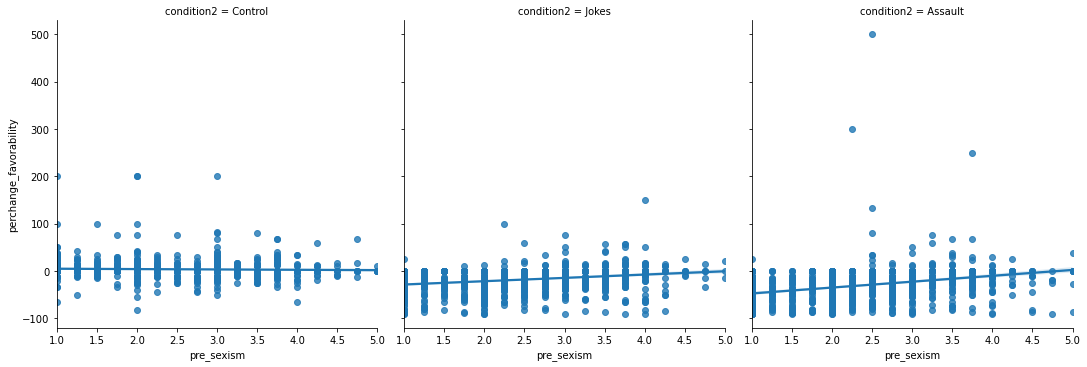

In [47]:
sns.lmplot(x="pre_sexism", y="perchange_favorability", col="condition2", data=df)

In [54]:
m1.params

Intercept                 3.722786
condition2[T.Assault]   -32.020991
condition2[T.Jokes]     -21.973304
dtype: float64

In [56]:
m1.conf_int()

,0,1
Intercept,1.479588,5.965983
condition2[T.Assault],-35.187778,-28.854205
condition2[T.Jokes],-25.144545,-18.802064


In [62]:
errorbars = m1.params - m1.conf_int()[0]
errorbars

Intercept                2.243198
condition2[T.Assault]    3.166786
condition2[T.Jokes]      3.171240
dtype: float64

In [63]:
# ignore intercept 
coef_df = pd.DataFrame({'coef': m1.params.values[1:],
                        'err': errorbars.values[1:],
                        'varname': errorbars.index.values[1:]
                       })
coef_df

,coef,err,varname
0,-32.020991,3.166786,condition2[T.Assault]
1,-21.973304,3.171240,condition2[T.Jokes]


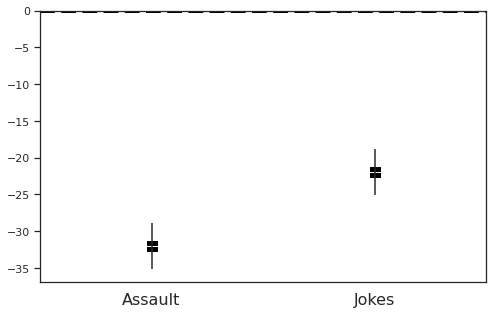

In [73]:
#plot
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Assault', 'Jokes'#, 'Edu.', 'Catholic', 'Infant Mort.'
                       ], 
                       rotation=0, fontsize=16)


In [49]:
# coefplot following this guide: https://zhiyzuo.github.io/Python-Plot-Regression-Coefficient/
#Collect coefficients
formula_1 = 'fertility ~ %s'%(" + ".join(df.columns.values[1:-1]))
print(formula_1)
mod_1 = smf.ols(formula_1, data=df).fit()
mod_1.params
fertility ~ agri + exam + edu + catholic

Intercept    91.055424
agri         -0.220646
exam         -0.260582
edu          -0.961612
catholic      0.124418
dtype: float64
formula_2 = 'fertility ~ %s'%(" + ".join(df.columns.values[1:-2].tolist() + ['infant_mort']))
print(formula_2)
mod_2 = smf.ols(formula_2, data=df).fit()
mod_2.params
fertility ~ agri + exam + edu + infant_mort

Intercept      68.773136
agri           -0.129292
exam           -0.687994
edu            -0.619649
infant_mort     1.307097
dtype: float64
coef_df = pd.DataFrame()
for i, mod in enumerate([mod_1, mod_2]):
    err_series = mod.params - mod.conf_int()[0]
    coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values[1:],
                                           'err': err_series.values[1:],
                                           'varname': err_series.index.values[1:],
                                           'model': 'model %d'%(i+1)
                                          })
                            )
coef_df
coef	err	model	varname
0	-0.220646	0.148531	model 1	agri
1	-0.260582	0.553176	model 1	exam
2	-0.961612	0.392609	model 1	edu
3	0.124418	0.075207	model 1	catholic
0	-0.129292	0.151049	model 2	agri
1	-0.687994	0.456646	model 2	exam
2	-0.619649	0.355803	model 2	edu
3	1.307097	0.820514	model 2	infant_mort
Plot!
## marker to use
marker_list = 'so'
width=0.25
## 5 covariates in total
base_x = pd.np.arange(5) - 0.2
base_x
array([-0.2,  0.8,  1.8,  2.8,  3.8])
fig, ax = plt.subplots(figsize=(8, 5))
for i, mod in enumerate(coef_df.model.unique()):
    mod_df = coef_df[coef_df.model == mod]
    mod_df = mod_df.set_index('varname').reindex(coef_df['varname'].unique())
    ## offset x posistions
    X = base_x + width*i
    ax.bar(X, mod_df['coef'],  
           color='none',yerr=mod_df['err'])
    ## remove axis labels
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=X, 
               marker=marker_list[i], s=120, 
               y=mod_df['coef'], color='black')
    ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
    ax.xaxis.set_ticks_position('none')
    _ = ax.set_xticklabels(['', 'Agriculture', 'Exam', 'Edu.', 'Catholic', 'Infant Mort.'], 
                           rotation=0, fontsize=16)

    fs = 16
    ax.annotate('Control', xy=(0.3, -0.2), xytext=(0.3, -0.35), 
                xycoords='axes fraction', 
                textcoords='axes fraction', 
                fontsize=fs, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white', ec='black'),
                arrowprops=dict(arrowstyle='-[, widthB=6.5, lengthB=1.2', lw=2.0, color='black'))

    ax.annotate('Study', xy=(0.8, -0.2), xytext=(0.8, -0.35), 
                xycoords='axes fraction', 
                textcoords='axes fraction', 
                fontsize=fs, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white', ec='black'),
                arrowprops=dict(arrowstyle='-[, widthB=3.5, lengthB=1.2', lw=2.0, color='black'))
    
## finally, build customized legend
legend_elements = [Line2D([0], [0], marker=m,
                          label='Model %d'%i,
                          color = 'k',
                          markersize=10)
                   for i, m in enumerate(marker_list)
                  ]
_ = ax.legend(handles=legend_elements, loc=2, 
              prop={'size': 15}, labelspacing=1.2)

AttributeError: module 'seaborn' has no attribute 'coefplot'